 # Introduction to Neural Network Classificcation with Tensorflow

1. Binary classification
2. Multiclass
3. Multilabel

## Creating data to view and fit

In [36]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples=1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
# check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualise data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1": X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


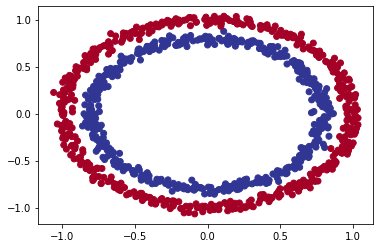

In [6]:
# Visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [7]:
#Check the shapres of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
#How many samples we're working
len(X), len(y)

(1000, 1000)

In [9]:
#View the first example of features and labels
X[5], y[5]

(array([-0.47964637,  0.67643477]), 1)

## Steps in modelling

In [10]:
import tensorflow as tf
import numpy as np

In [11]:
# Set the random seed
tf.random.set_seed(42)

#1. create teh model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4820


In [12]:
# lets try improve our model by training longer
model_1.fit(X,y,epochs=200,verbose=0)

In [13]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Lets add an extra layer

In [14]:
tf.random.set_seed(42)

#1. create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [15]:
#4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Improving our Model

1. create a model - add more layers or increase no of hidden units within a layer
2. compile model - choose a diff optimisation fn such as Adam
3. fitting a model - add more epochs

In [16]:
# set the random seed
tf.random.set_seed(42)

#1. create a model with 3 layers
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), #add 100 dense neurons
    tf.keras.layers.Dense(10), #add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])


#2. compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. fit the model
model_3.fit(X,y, epochs=100, verbose=0)

In [17]:
#4. Evaluate model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

function to visualise models Predictions

1. take trained model, X and y
2. create meshgrif of diff X values
3. Make prediction acroos meshgrid
4. Plot the predictions as well as a line between zones


In [18]:
def plot_decision_boundary(model,X,y):
  #define axis boundaries and create meshgrid
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() +0.1
  y_min,y_max = X[:,1].min()-0.1,X[:,1].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))

  #Create X values
  x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  #Make prediction
  y_pred=model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")

    #We have to reshape predictions to get them for plotiing
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot decision boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c =y, s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


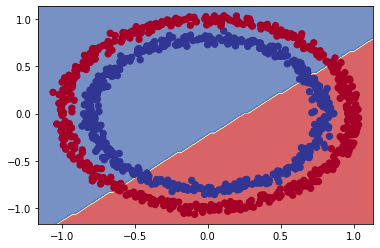

In [19]:
#Check out the predictions
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

In [26]:
 #Lets see if the model can be used for regression model

 tf.random.set_seed(42)

 #Create some regreesion data
 X_regression = np.expand_dims(tf.range(0,1000,5),axis=1)
 y_regression = np.expand_dims(tf.range(100,1100,5),axis=1) # y =X+10

 #Split regrssion data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression data
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

Changing the data to accomodate regression

In [28]:
# set the random seed
tf.random.set_seed(42)

#1. create a model with 3 layers
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), #add 100 dense neurons
    tf.keras.layers.Dense(10), #add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])


#2. compile the model with regression specific loss function
model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. fit the model
model_3.fit(X_reg_train,y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 14ms/step


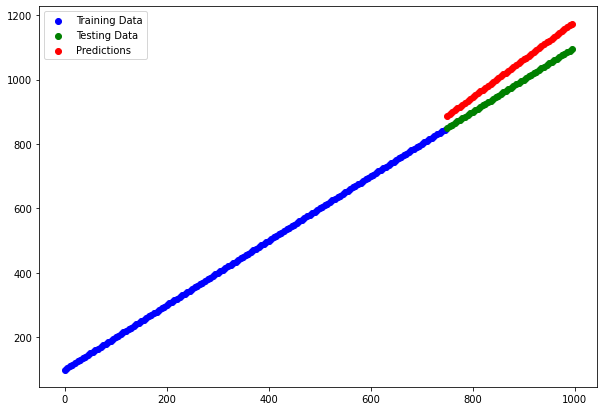

In [31]:
# Make predictions with our trained model
y_reg_preds=model_3.predict(X_reg_test)


#Plot the model predictions against reg data

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Testing Data")
plt.scatter(X_reg_test,y_reg_preds,c="r", label="Predictions")
plt.legend();

## Missing Piece-Non-linearity

In [37]:
#Set random seed
tf.random.set_seed(42)

#1.Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

#2.Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

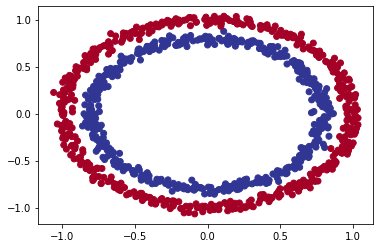

In [39]:
#Check out the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary classification


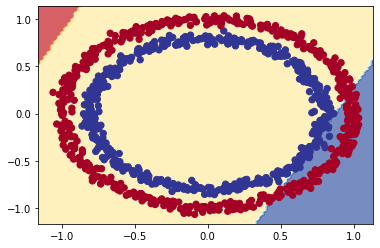

In [40]:
#Check the decision boundary for latest model
plot_decision_boundary(model_4,X,y)

Lets try our first neural network using non linear activation function

In [42]:
#Change the activation method to ReLU

#Set random seed
tf.random.set_seed(42)

#1.Create model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

#2.Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/100
32/32 [=

In [50]:
#Increase the hidden layers

#Set random seed
tf.random.set_seed(42)

#1.Create model with more hidden layers and neurons
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. fit the model
history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [51]:
# EValuate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification


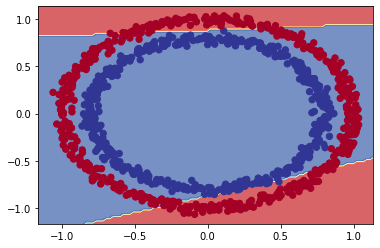

In [52]:
#how do the pred look like
plot_decision_boundary(model_6,X,y)

In [54]:
#INtroducting output activation function


#Set random seed
tf.random.set_seed(42)

#1.Create model with more hidden layers and neurons
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#2.Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. fit the model
history = model_7.fit(X,y,epochs=250)

Epoch 1/250


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/250
32/32 [=

In [55]:
#Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593365639448166, 0.9919999837875366]

313/313 [==============================] - 1s 1ms/step
doing binary classification


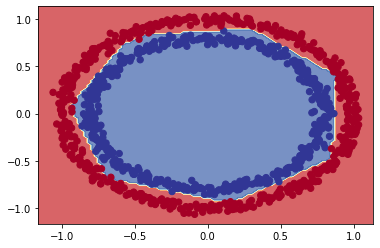

In [56]:
#Plot decisio boundaries
plot_decision_boundary(model_7,X,y)

In [57]:
#Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

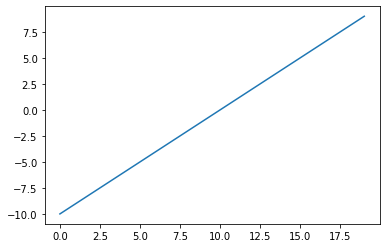

In [58]:
#visualise the tensor
plt.plot(A)

In [59]:
#Lets replicate the sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [60]:
#Use sigmoid on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

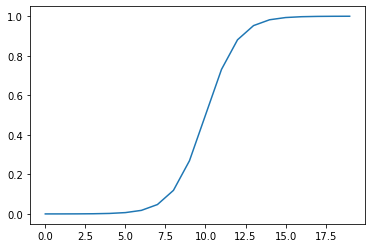

In [61]:
#Plot tensor transformedd by sigmoid
plt.plot(sigmoid(A))

In [62]:
def relu(x):
  return tf.maximum(0,x)

In [64]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

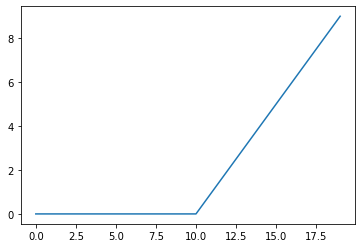

In [63]:
#Plot tensor transformedd by relu
plt.plot(relu(A))

In [65]:
#linear activation
tf.keras.activations.linear(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

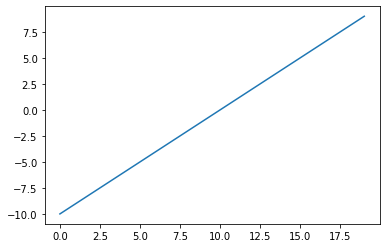

In [66]:
#Plot tensor transformedd by relu
plt.plot(tf.keras.activations.linear(A))